In [28]:
DATASET="rec.mu2e.CRV_wideband_cosmics.CRVWB-000-005-000-010.root"

In [29]:
import time
import os
from mu2etools import *
from mu2etools import wideband

In [30]:
processor = wideband.DataProcessor(usexroot=True,
                                   fixtimes=False,
                                   treename='run', 
                                   filter_name=['PEs', 'timeSinceSpill', 'spillNumber', 'eventNumber'],
                                   runlist=[1635], userunlist=True, remove=False
                                  )
ar = processor.getData(DATASET)
hep.style.use('ATLAS')  # or ATLAS/LHCb2

Text(1, 0, 'PEs')

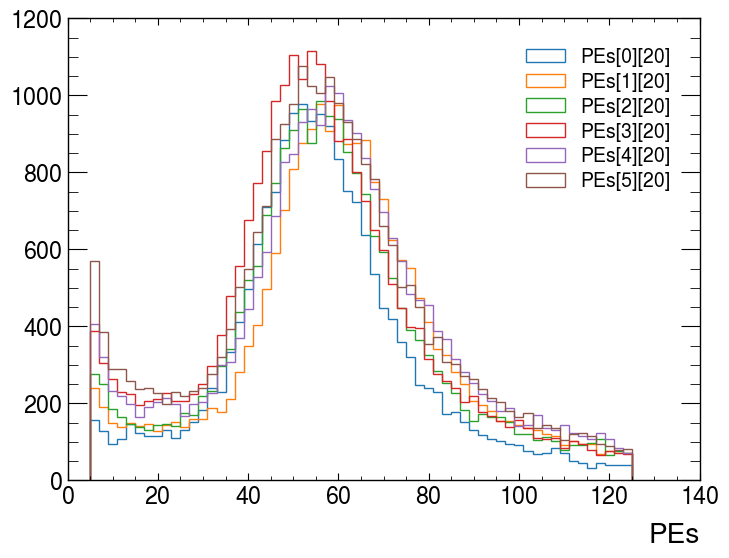

In [4]:
for feb in range(0,6):
    plt.hist(ar['PEs'][:,feb,20], histtype='step', bins=60, range=[5, 125], label='PEs[%d][20]'%feb);
plt.legend()
plt.xlabel('PEs')

In [5]:
ar

<Array [{spillNumber: 1, ...}, ..., {...}] type='380511 * {spillNumber: int...'>

In [6]:
#Mask layers in the trigger modules above the 10 PE threshold
FEB0_0 = (ak.sum(ar['PEs'][:,0,0:32], axis=-1)>10)
FEB0_1 = (ak.sum(ar['PEs'][:,0,32:64], axis=-1)>10)

FEB1_0 = (ak.sum(ar['PEs'][:,1,0:32], axis=-1)>10)
FEB1_1 = (ak.sum(ar['PEs'][:,1,32:64], axis=-1)>10)

FEB2_0 = (ak.sum(ar['PEs'][:,2,0:32], axis=-1)>10)
FEB2_1 = (ak.sum(ar['PEs'][:,2,32:64], axis=-1)>10)

FEB5_0 = (ak.sum(ar['PEs'][:,5,0:32], axis=-1)>10)
FEB5_1 = (ak.sum(ar['PEs'][:,5,32:64], axis=-1)>10)

arr_clean = ar[FEB0_0 & FEB0_1 & FEB1_0 & FEB1_1 & FEB2_0 & FEB2_1 & FEB5_0 & FEB5_1]

In [7]:
#Mask layers in the test module above the 10 PE threshold
FEB3_0 = (ak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>10)
FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>10)

FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>10)
FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>10)

In [8]:
nHits = ak.values_astype(FEB3_0, "int")+ \
       ak.values_astype(FEB3_1, "int")+ \
       ak.values_astype(FEB4_0, "int")+ \
       ak.values_astype(FEB4_1, "int")

In [9]:
nPass = ak.count(arr_clean[(nHits==4) | (nHits==3)]['eventNumber'])
nTrig = ak.count(arr_clean['eventNumber'])
print('3-4 efficiency: %.2f'%(nPass/nTrig*100))

3-4 efficiency: 99.96


In [10]:
nPass = ak.count(arr_clean[(nHits==4)]['eventNumber'])
nTrig = ak.count(arr_clean['eventNumber'])
print('4-4 efficiency: %.2f'%(nPass/nTrig*100))

4-4 efficiency: 98.52


Text(1, 0, 'nHits')

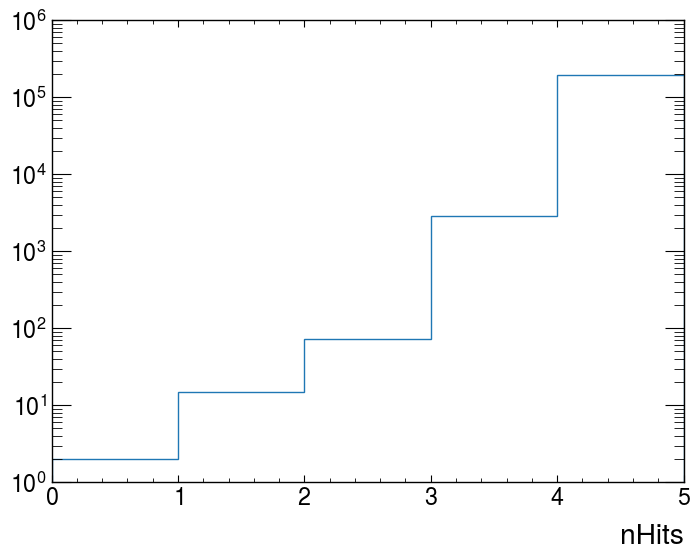

In [11]:
plt.hist(nHits, histtype='step', bins=5, range=(0,5));
plt.yscale('log')
plt.xlabel('nHits')

In [12]:
#Failed events with only one hit in CRV
arr_clean[(nHits==1)]

<Array [{spillNumber: 58, ...}, ..., {...}] type='15 * {spillNumber: int32,...'>

In [32]:
ineff_5 = []
ineff_6 = []
ineff_7 = []
ineff_8 = []

for i in range(10,140,10):

    FEB0_0 = (ak.sum(ar['PEs'][:,0,0:32], axis=-1)>i)
    FEB0_1 = (ak.sum(ar['PEs'][:,0,32:64], axis=-1)>i)

    FEB1_0 = (ak.sum(ar['PEs'][:,1,0:32], axis=-1)>i)
    FEB1_1 = (ak.sum(ar['PEs'][:,1,32:64], axis=-1)>i)

    FEB2_0 = (ak.sum(ar['PEs'][:,2,0:32], axis=-1)>i)
    FEB2_1 = (ak.sum(ar['PEs'][:,2,32:64], axis=-1)>i)

    FEB5_0 = (ak.sum(ar['PEs'][:,5,0:32], axis=-1)>i)
    FEB5_1 = (ak.sum(ar['PEs'][:,5,32:64], axis=-1)>i)
    
    nHits = ak.values_astype(FEB0_0, "int") + ak.values_astype(FEB0_1, "int") + \
            ak.values_astype(FEB1_0, "int") + ak.values_astype(FEB1_1, "int") + \
            ak.values_astype(FEB2_0, "int") + ak.values_astype(FEB2_1, "int") + \
            ak.values_astype(FEB5_0, "int") + ak.values_astype(FEB5_1, "int")

    
    for hits in range(5,9):
    
        arr_clean = ar[nHits >= hits]
    
        FEB3_0 = (ak.sum(arr_clean['PEs'][:,3,0:32], axis=-1)>i)
        FEB3_1 = (ak.sum(arr_clean['PEs'][:,3,32:64], axis=-1)>i)

        FEB4_0 = (ak.sum(arr_clean['PEs'][:,4,0:32], axis=-1)>i)
        FEB4_1 = (ak.sum(arr_clean['PEs'][:,4,32:64], axis=-1)>i)
    
        nHits_test = ak.values_astype(FEB3_0, "int") + ak.values_astype(FEB3_1, "int") + \
                     ak.values_astype(FEB4_0, "int") + ak.values_astype(FEB4_1, "int")
        
        if hits == 5:
            nPass = ak.count(arr_clean[(nHits_test>=1)]['eventNumber'])
            nTrig = ak.count(arr_clean['eventNumber'])
            ineff_5.append(1 - nPass/nTrig)
        if hits == 6:
            nPass = ak.count(arr_clean[(nHits_test>=1)]['eventNumber'])
            nTrig = ak.count(arr_clean['eventNumber'])
            ineff_6.append(1 - nPass/nTrig)
        if hits == 7:
            nPass = ak.count(arr_clean[(nHits_test>=1)]['eventNumber'])
            nTrig = ak.count(arr_clean['eventNumber'])
            ineff_7.append(1 - nPass/nTrig)
        if hits == 8:
            nPass = ak.count(arr_clean[(nHits_test>=1)]['eventNumber'])
            nTrig = ak.count(arr_clean['eventNumber'])
            ineff_8.append(1 - nPass/nTrig)
        print(nPass, nTrig)


271437 271554
253105 253162
226511 226525
198731 198733
270325 270460
252066 252131
225443 225461
197493 197498
269863 270002
251655 251725
224863 224881
196446 196450
269466 269614
251250 251324
224348 224369
194963 194968
269125 269273
250815 250887
223605 223626
192277 192283
268647 268800
250260 250339
222713 222741
187843 187852
268022 268176
249399 249477
221106 221133
179757 179766
266719 266874
247494 247569
215987 216017
159872 159882
262826 262989
239138 239217
192949 192978
114996 115005
245086 245465
201692 201924
131264 131378
57764 57800
186450 188167
124095 124993
62164 62493
22985 23046
107587 110969
59709 60970
26353 26658
10571 10615
56683 60080
29921 30904
13657 13838
6768 6798


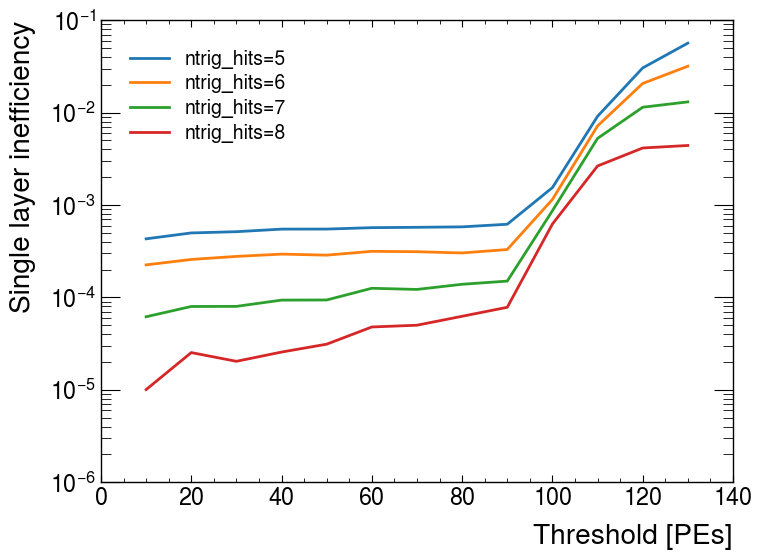

In [33]:
    
fig, ax = plt.subplots()

ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_5, label='ntrig_hits=5')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_6, label='ntrig_hits=6')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_7, label='ntrig_hits=7')
ax.plot(np.linspace(10, 130, 13, endpoint=True), ineff_8, label='ntrig_hits=8')

ax.legend()

#ax.set_ylim(0.1, 1)

ax.set_yscale('log')

ax.set_xlabel('Threshold [PEs]')
ax.set_ylabel('Single layer inefficiency')

plt.show()